In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Setting seaborn style for better aesthetics
sns.set_style('whitegrid')

In [17]:
# Load the dataset
data = pd.read_csv("insurance.csv")

# Display first few rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# Check for missing values
data.isnull().sum()

# Summary statistics
data.describe()

# Convert categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Check the transformed dataset
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


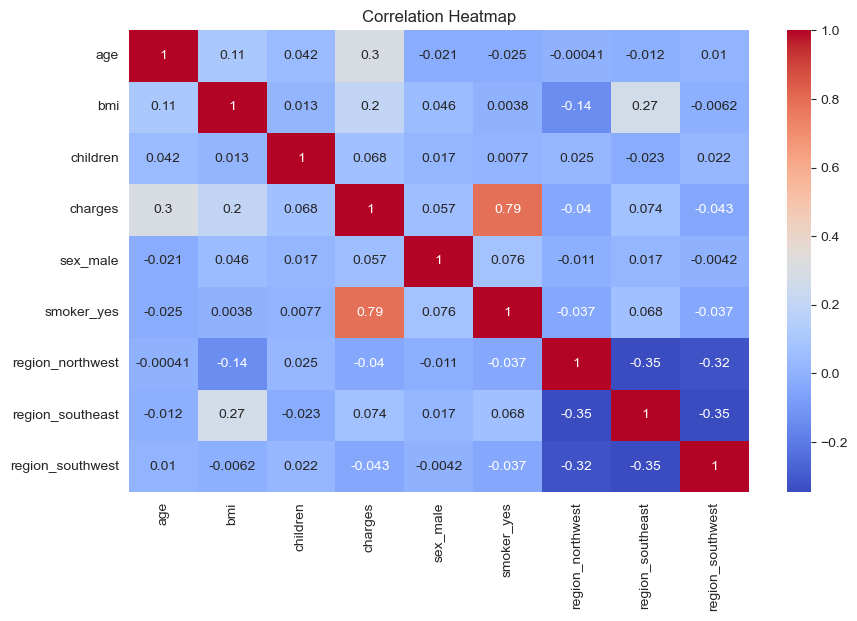

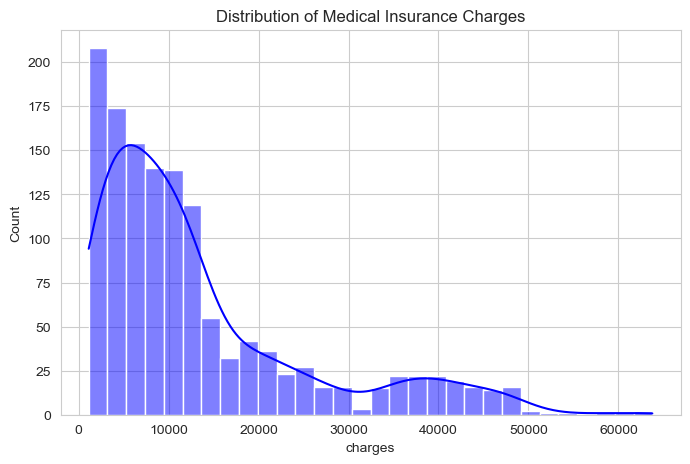

In [21]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of charges
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Insurance Charges')
plt.show()

Linear Regression RMSE: 5796.284659276273
Linear Regression R2 Score: 0.7835929767120724


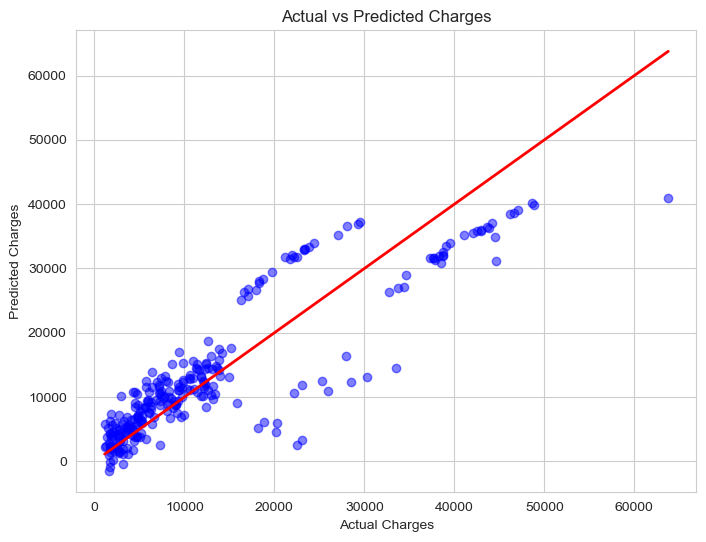

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R2 Score: {r2}')

# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Reference line for perfect predictions
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

Random Forest RMSE: 4576.299916157115
Random Forest R2 Score: 0.8651034329144947


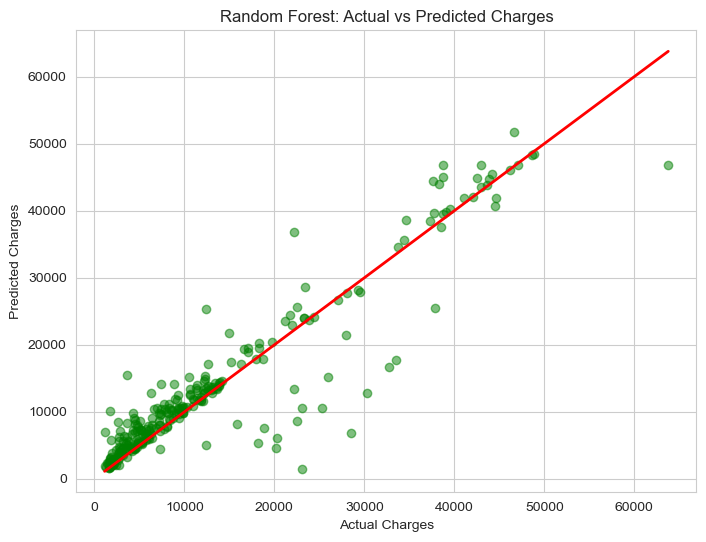

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')

# Scatter Plot of Actual vs. Predicted Values for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Reference line for perfect predictions
plt.title("Random Forest: Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

Decision Tree RMSE: 6515.129162967606
Decision Tree R2 Score: 0.7265877305258355


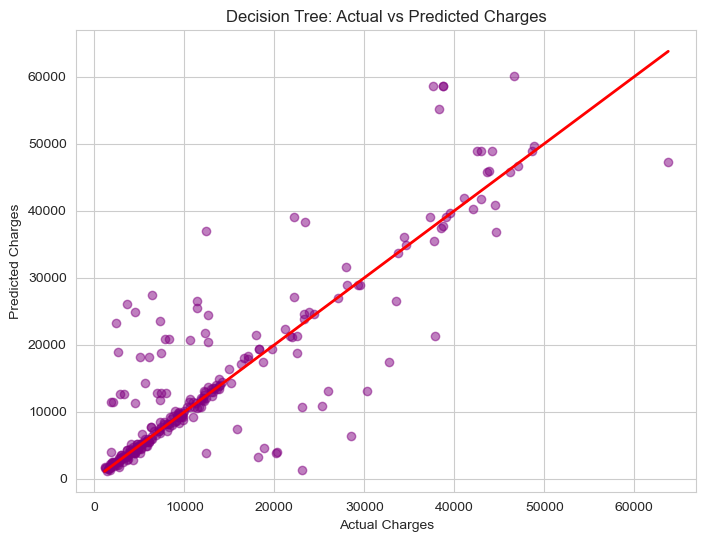

In [39]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_reg.predict(X_test)

# Model evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree RMSE: {rmse_dt}')
print(f'Decision Tree R2 Score: {r2_dt}')

# Scatter Plot of Actual vs. Predicted Values for Decision Tree
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Reference line for perfect predictions
plt.title("Decision Tree: Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()